In [1]:
#  Import in the usual stuff
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sunpy import timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a
from astropy.time import Time
from astropy.time import TimeDelta
from sunpy.time import parse_time

#  Here just assuming it save to your sunpy/data dir but can of course change
outdir='/Users/iain/sunpy/data/'


---
Testing that can get GOES XRS 15 data for the 2014 X-class flares....

In [2]:
# All X-flares over GOES 15 time 2010-09 to 2020-03
trange=a.Time("2010-09-01 00:00","2020-03-01 00:00")

res = Fido.search(trange,a.hek.EventType("FL"),
                  a.hek.FL.GOESCls > "X1.0",a.hek.FRM.Name == "SSW Latest Events")


In [3]:
hekres = res["hek"]
shrt_res = hekres["event_starttime", "event_peaktime","event_endtime", "fl_goescls"]

In [4]:
shrt_res

event_starttime,event_peaktime,event_endtime,fl_goescls
Time,Time,Time,str4
2011-02-15 01:44:00.000,2011-02-15 01:45:00.000,2011-02-15 01:56:00.000,X2.2
2011-03-09 23:13:00.000,2011-03-09 23:16:00.000,2011-03-09 23:23:00.000,X1.5
2011-08-09 07:48:00.000,2011-08-09 08:05:00.000,2011-08-09 08:08:00.000,X6.9
2011-09-06 22:12:00.000,2011-09-06 22:20:00.000,2011-09-06 22:24:00.000,X2.1
2011-09-06 22:12:00.000,2011-09-06 22:20:00.000,2011-09-06 22:24:00.000,X2.1
2011-09-07 22:32:00.000,2011-09-07 22:38:00.000,2011-09-07 22:44:00.000,X1.8
...,...,...,...
2014-12-20 00:11:00.000,2014-12-20 00:24:00.000,2014-12-20 00:28:00.000,X1.8
2015-03-11 16:11:00.000,2015-03-11 16:22:00.000,2015-03-11 16:29:00.000,X2.1


In [5]:
# Here are the 2014 ones
print(shrt_res[18:31])

    event_starttime          event_peaktime     ... fl_goescls
----------------------- ----------------------- ... ----------
2014-01-07 18:04:00.000 2014-01-07 18:32:00.000 ...       X1.2
2014-01-07 18:04:00.000 2014-01-07 18:30:00.000 ...       X1.2
2014-06-10 11:36:00.000 2014-06-10 11:42:00.000 ...       X2.2
2014-06-10 12:36:00.000 2014-06-10 12:52:00.000 ...       X1.5
2014-09-10 17:21:00.000 2014-09-10 17:45:00.000 ...       X1.6
2014-10-19 04:17:00.000 2014-10-19 05:01:00.000 ...       X1.1
2014-10-22 14:02:00.000 2014-10-22 14:28:00.000 ...       X1.6
2014-10-24 21:07:00.000 2014-10-24 21:40:00.000 ...       X3.1
2014-10-26 10:04:00.000 2014-10-26 10:56:00.000 ...       X2.0
2014-10-27 14:12:00.000 2014-10-27 14:47:00.000 ...       X2.0
2014-11-07 16:53:00.000 2014-11-07 17:25:00.000 ...       X1.6
2014-12-20 00:11:00.000 2014-12-20 00:27:00.000 ...       X1.8
2014-12-20 00:11:00.000 2014-12-20 00:24:00.000 ...       X1.8


In [6]:
# For first event the GOES 15 data is online:
# 2sec data:
# https://satdat.ngdc.noaa.gov/sem/goes/data/science/xrs/goes15/gxrs-l2-irrad_science/2014/04/sci_gxrs-l2-irrad_g15_d20140401_v0-0-0.nc
# avg1min science data:
# https://satdat.ngdc.noaa.gov/sem/goes/data/science/xrs/goes15/xrsf-l2-avg1m_science/2014/01/sci_xrsf-l2-avg1m_g15_d20140107_v1-0-0.nc


# Note the upcoming change of urls with:
# https://satdat.ngdc.noaa.gov/sem/goes/ -> https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/
# i.e. https://solarnews.nso.edu/upcoming-ngdc-satdat-url-change/

In [7]:
# Can fido get it for me?
gtstart=Time(shrt_res[18]["event_starttime"],scale='utc')-TimeDelta(10*60,format='sec')
gtend=Time(shrt_res[18]["event_endtime"],scale='utc')+TimeDelta(10*60,format='sec')

# Search and get the XRS data
tflrange=a.Time(gtstart.iso,gtend.iso)
rg15 = Fido.search(tflrange, a.Instrument("XRS"), a.goes.SatelliteNumber(15))
print(rg15)
fg15 = Fido.fetch(rg15,path=outdir,overwrite=False)


Results from 1 Provider:

1 Results from the XRSClient:
Source: <13: https://umbra.nascom.nasa.gov/goes/fits 
13, 14, 15: https://satdat.ngdc.noaa.gov/sem/goes/data/science/ 
16, 17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        Instrument ... Source Provider
----------------------- ----------------------- ---------- ... ------ --------
2014-01-07 00:00:00.000 2014-01-07 23:59:59.999        XRS ...   GOES     NOAA




Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [8]:
print(fg15)

['/Users/iain/sunpy/data/sci_gxrs-l2-irrad_g15_d20140107_v0-0-0.nc']


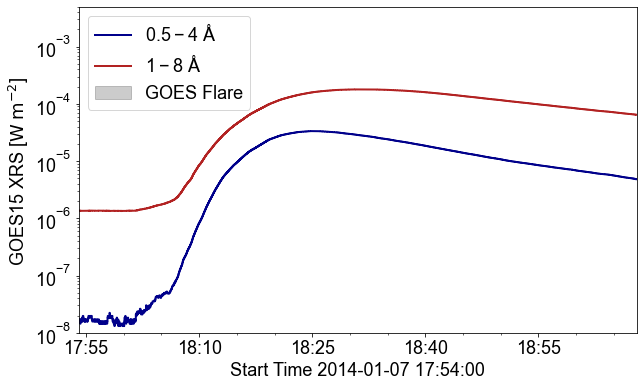

In [13]:
fg15=glob.glob(outdir+'sci_gxrs-l2-irrad_g15_d20140107_v0-0-0.nc')
g15 = ts.TimeSeries(fg15, concatenate=True)

tg15=g15.truncate(tflrange.start.iso,tflrange.end.iso)

tg_tims=tg15.index
tg_x05=tg15.quantity("xrsa").value
tg_x18=tg15.quantity("xrsb").value

# And then plot it all
tfl=a.Time(shrt_res[18]["event_starttime"],shrt_res[18]["event_endtime"])

plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular"})

fig,ax = plt.subplots(figsize=(10, 6))
plt.plot(tg_tims,tg_x05,drawstyle='steps-post',marker=None,color='darkblue',lw=2,label='$0.5-4\;\AA$')
plt.plot(tg_tims,tg_x18,drawstyle='steps-post',marker=None,color='firebrick',lw=2,label='$1-8\;\AA$')

ax.set_ylabel("GOES15 XRS [$\mathrm{W\;m^{-2}}$] ")
ax.set_xlabel("Start Time "+tflrange.start.iso[:-4])
ax.set_yscale("log")
ax.set_ylim([1e-8,5e-3])
ax.set_xlim([tflrange.start.datetime,tflrange.end.datetime])
myFmt = matplotlib.dates.DateFormatter('%H:%M')
majorx= matplotlib.dates.MinuteLocator(interval=15)
minorx= matplotlib.dates.MinuteLocator(interval=5)
ax.xaxis.set_major_locator(majorx)
ax.xaxis.set_minor_locator(minorx)
ax.xaxis.set_major_formatter(myFmt)
ax.axvline(parse_time(shrt_res[18]["event_peaktime"]).datetime,color='black',ls='-.')
ax.axvspan(tfl.start.datetime,tfl.end.datetime,color='black',alpha=0.2, label='GOES Flare')
plt.legend()
plt.show()

---
Testing if there is missing data from NOAA server for date in 2011

In [10]:
rg=Fido.search(a.Time("2011-03-09 23:00","2011-03-10 02:10"), a.Instrument("XRS"))
print(rg)


Results from 1 Provider:

0 Results from the XRSClient:
Source: <13: https://umbra.nascom.nasa.gov/goes/fits 
13, 14, 15: https://satdat.ngdc.noaa.gov/sem/goes/data/science/ 
16, 17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

<No columns>




In [11]:
# Was there at some point
# https://www.solarmonitor.org/data/2011/03/10/pngs/goes/goes_xrays_20110310.png
# but mostly missing files in the noaa directory for that month:
# https://satdat.ngdc.noaa.gov/sem/goes/data/science/xrs/goes15/gxrs-l2-irrad_science/2011/03/

In [12]:
trange=a.Time("2010-03-01 00:00","2020-03-01 00:00")
res = Fido.search(trange,a.hek.EventType("FL"),a.hek.FL.GOESCls > "X1.0",a.hek.OBS.Observatory == "GOES")
hekres = res["hek"]
shrt_res = hekres["event_starttime", "event_peaktime","event_endtime", "fl_goescls"]

# These were the ones that returned no G15 XRS data?
print(shrt_res[1])
print(shrt_res[15])

# get rid of them from the list
ind=list(range(len(shrt_res)))
ind2=[i for i in ind if not (i ==1 or i==15)]
new_res=shrt_res[ind2]

print(len(new_res))
new_res

    event_starttime          event_peaktime          event_endtime      fl_goescls
----------------------- ----------------------- ----------------------- ----------
2011-03-09 23:13:00.000 2011-03-09 23:23:00.000 2011-03-09 23:29:00.000       X1.5
    event_starttime          event_peaktime          event_endtime      fl_goescls
----------------------- ----------------------- ----------------------- ----------
2012-10-23 03:13:00.000 2012-10-23 03:17:00.000 2012-10-23 03:21:00.000       X1.8
43


event_starttime,event_peaktime,event_endtime,fl_goescls
Time,Time,Time,str4
2011-02-15 01:44:00.000,2011-02-15 01:56:00.000,2011-02-15 02:06:00.000,X2.2
2011-08-09 07:48:00.000,2011-08-09 08:05:00.000,2011-08-09 08:08:00.000,X6.9
2011-09-06 22:12:00.000,2011-09-06 22:20:00.000,2011-09-06 22:24:00.000,X2.1
2011-09-06 22:12:00.000,2011-09-06 22:20:00.000,2011-09-06 22:24:00.000,X2.1
2011-09-07 22:32:00.000,2011-09-07 22:38:00.000,2011-09-07 22:44:00.000,X1.8
2011-09-22 10:29:00.000,2011-09-22 11:01:00.000,2011-09-22 11:44:00.000,X1.4
...,...,...,...
2014-12-20 00:11:00.000,2014-12-20 00:28:00.000,2014-12-20 00:55:00.000,X1.8
2015-03-11 16:11:00.000,2015-03-11 16:22:00.000,2015-03-11 16:29:00.000,X2.1
